In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display  import display
from   pylab  import rcParams

In [2]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.3.4
Numpy version: 1.20.3
Seaborn version: 0.11.2
Matplotlib version: 3.4.3
Statsmodels version: 0.12.2


### 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
DF=pd.read_csv("Sparkling.csv")
print(DF.head(5))

  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


In [4]:
df1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)
print(df1.head(5))

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64


In [5]:
df2 = pd.read_csv("Sparkling.csv")

In [6]:
date = pd.date_range(start='1/1/1980', end='8/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df2.head(10)

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31
5,1980-06,1377,1980-06-30
6,1980-07,1966,1980-07-31
7,1980-08,2453,1980-08-31
8,1980-09,1984,1980-09-30
9,1980-10,2596,1980-10-31


In [8]:
df = df2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head(10)

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
1980-06-30,1377
1980-07-31,1966
1980-08-31,2453
1980-09-30,1984


In [9]:
df.tail(5)

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [11]:
df.isnull().sum()

Sparkling    0
dtype: int64

Now, data is ready for the Time Series Analysis.

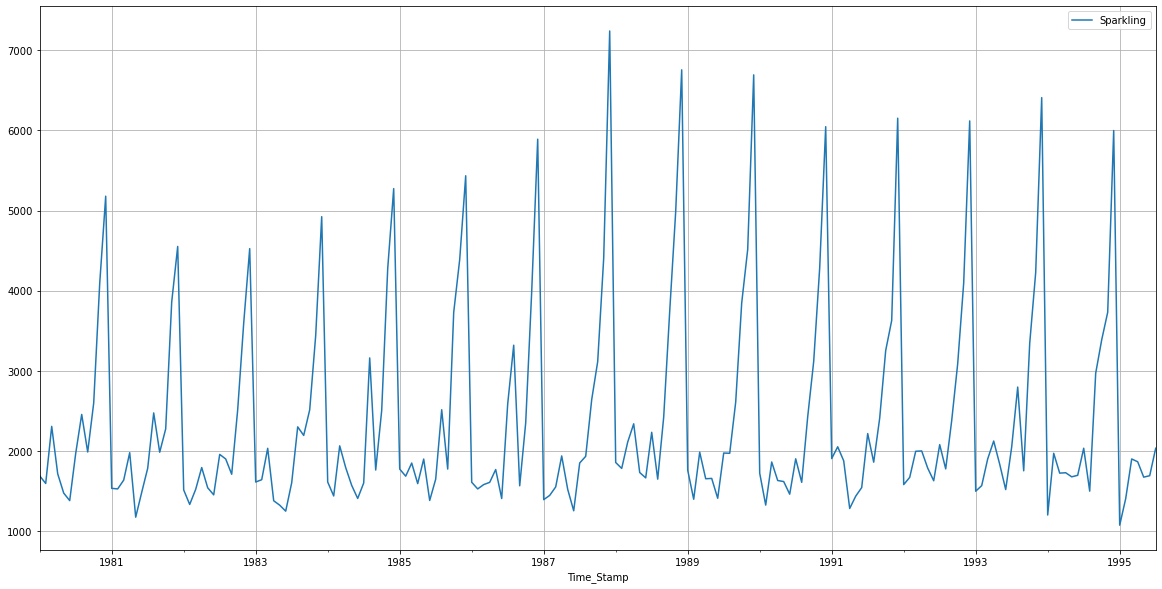

In [13]:
df.plot(figsize=(20,10))
plt.grid();

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### EDA : Descriptive stats and graphs

In [14]:
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417,1295.112,1070.0,1605.0,1874.0,2549.0,7242.0


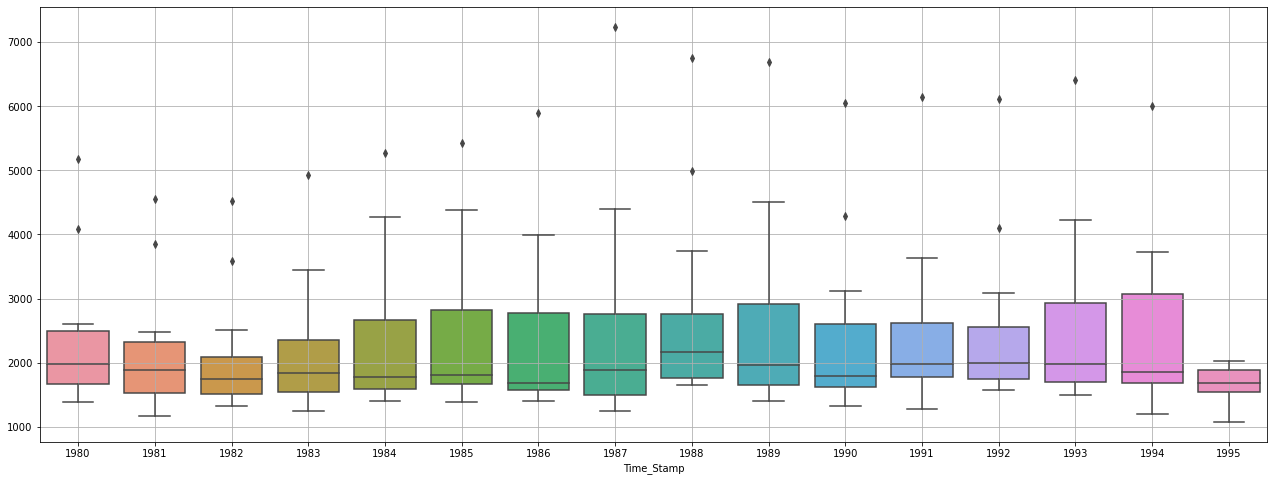

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

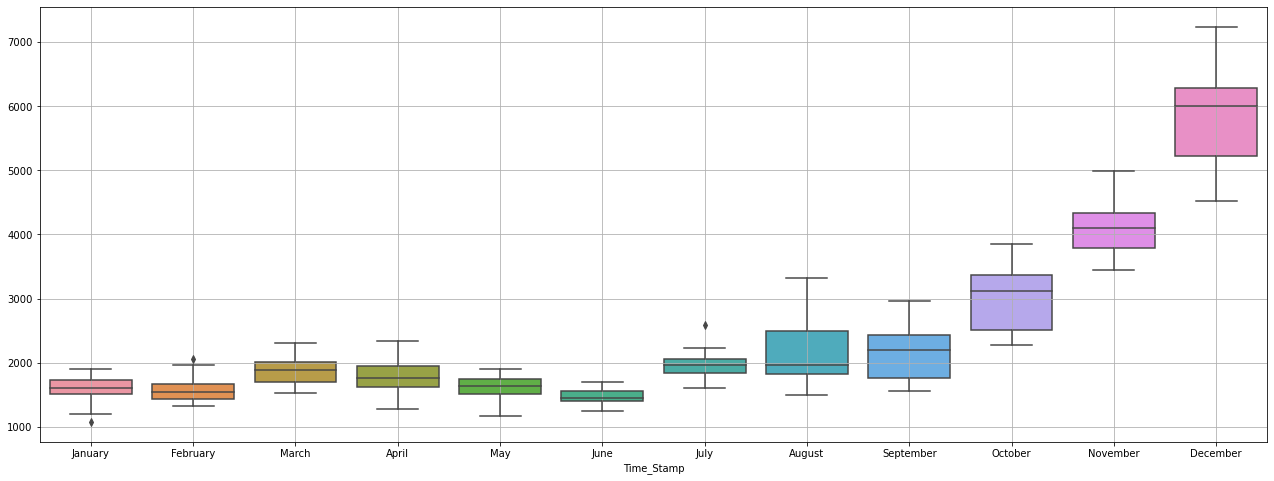

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


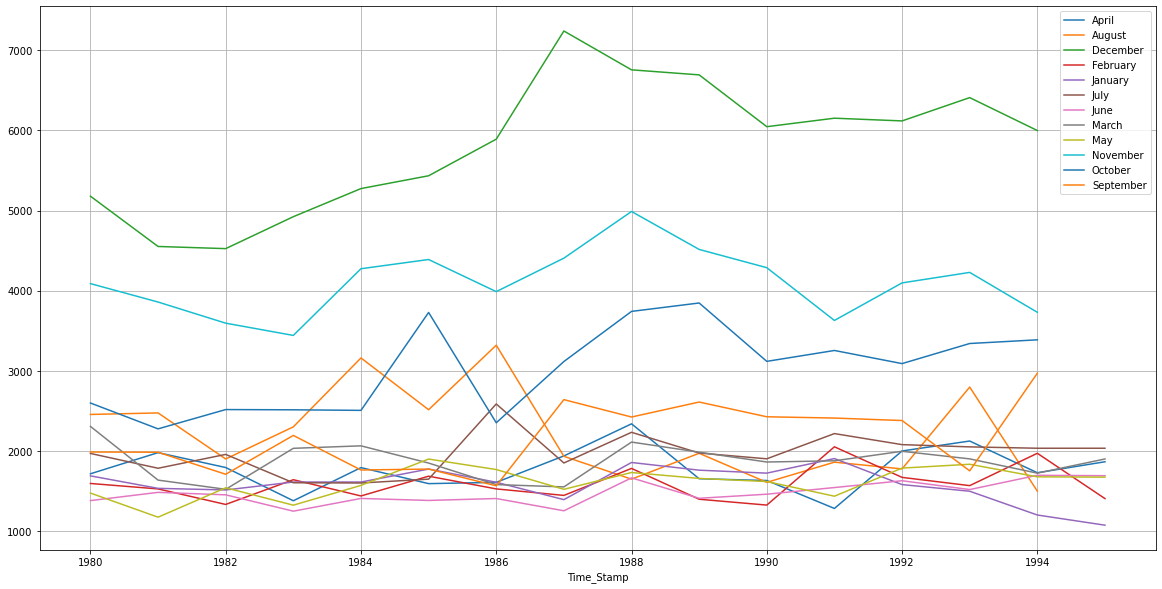

In [18]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Decomposition of Time Series

In [19]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

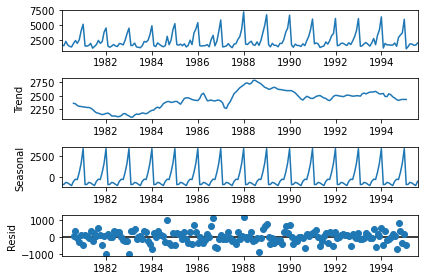

In [20]:
decomposition = seasonal_decompose(df, model="additive")
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

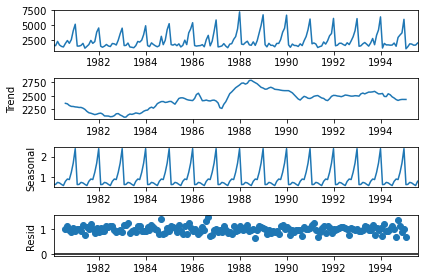

In [22]:
decomposition = seasonal_decompose(df, model="multiplicative")
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

### 3. Split the data into training and test. The test data should start in 1991.

In [24]:
train    =   df[df.index < '1991'] 
test     =   df[df.index >='1991']

In [25]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [26]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



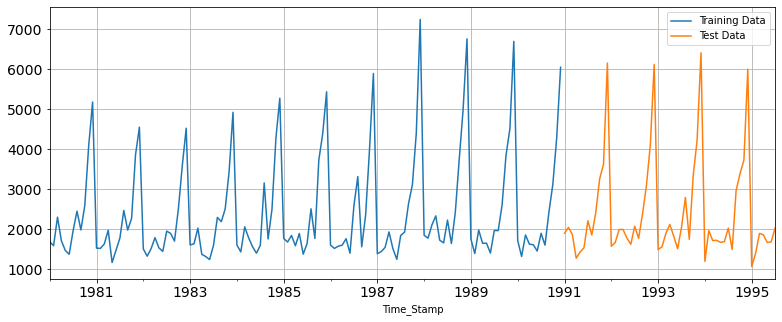

In [27]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

### Model 1: Simple Exponential Smoothing

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [29]:
SES_train = train.copy()
SES_test = test.copy()

In [30]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [31]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


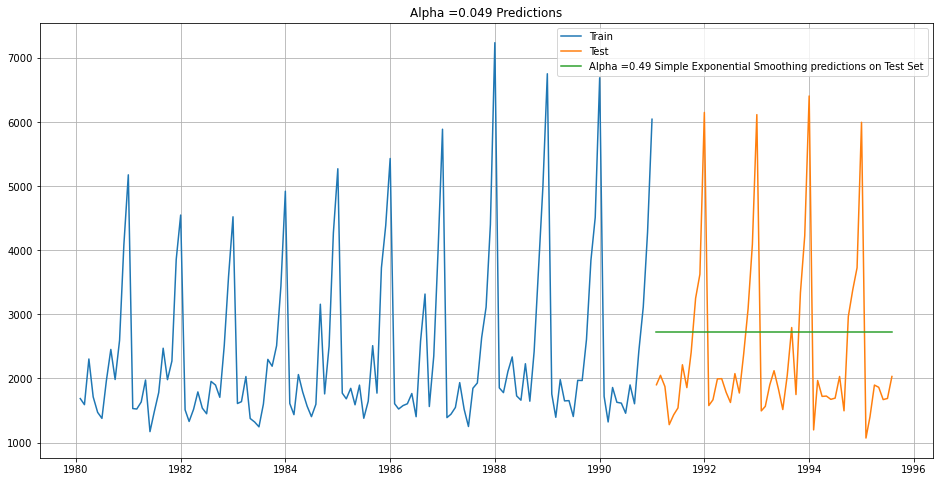

In [34]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.49 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [35]:
## Test Data

rmse1_SESmodel = mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse1_SESmodel))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [36]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse1_SESmodel]},index=['Alpha=0.049,SimpleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDf_SES])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487


#### Setting different alpha values. As the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [37]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_SES1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_SES1

,Alpha Values,Train RMSE,Test RMSE


In [38]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [39]:
rmse1_SESmodel_train_i = mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)

rmse1_SESmodel_test_i = mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)

resultsDf_SES1 = resultsDf_SES1.append({'Alpha Values':i,'Train RMSE':rmse1_SESmodel_train_i ,
                                        'Test RMSE':rmse1_SESmodel_test_i}, ignore_index=True)

In [40]:
resultsDf_SES1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.9,1355.723518,3686.794285


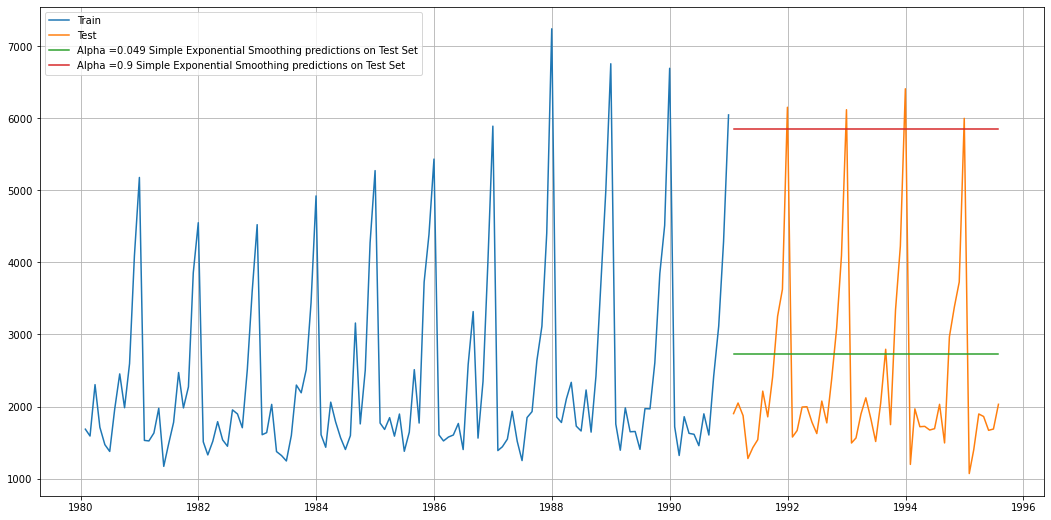

In [41]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',i], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [42]:
resultsSES_final = pd.DataFrame({'Test RMSE':resultsDf_SES1.sort_values(by=['Test RMSE'],ascending=True).values[0][2]}
                           ,index=['Alpha=0.9,SES'])
resultsSES_final

,Test RMSE
"Alpha=0.9,SES",3686.794285


In [43]:
resultsDF1 = pd.concat([resultsDF1,resultsSES_final])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285


### Model 2. Double Exponential Smoothing Model

In [44]:
DES_train = train.copy()
DES_test = test.copy()

In [45]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [46]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [48]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,5221.278699
1991-02-28,2049,5127.886554
1991-03-31,1874,5034.494409
1991-04-30,1279,4941.102264
1991-05-31,1432,4847.710119


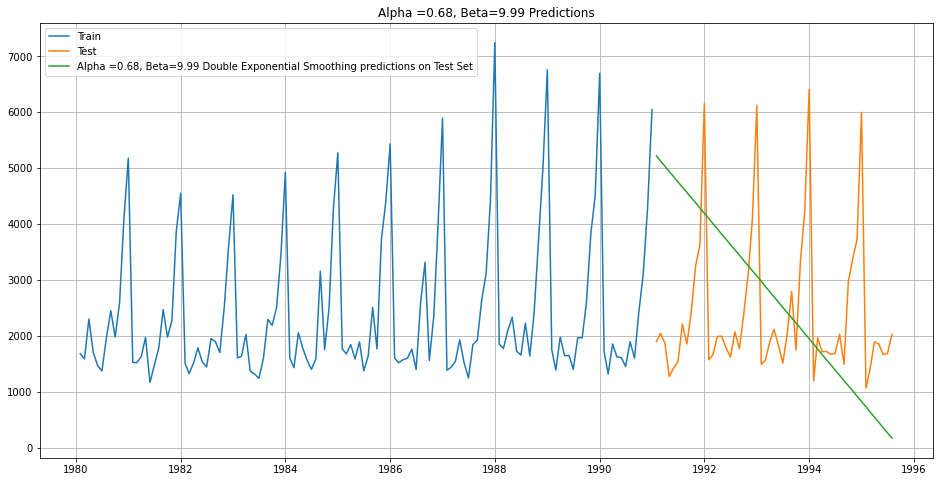

In [49]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.68, Beta=9.99 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.68, Beta=9.99 Predictions');

In [50]:
## Test Data

rmse1_DESmodel = mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.68, Beta= 9.99 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse1_DESmodel))

For Alpha =0.68, Beta= 9.99 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [51]:
resultsDES_2 = pd.DataFrame({'Test RMSE':[rmse1_DESmodel]}, index=['Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsDES_2])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526


#### Setting different alpha and beta values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha and beta values to understand which particular value works best for alpha and beta on the test set.

In [52]:
## First we will define an empty dataframe to store our values from the loop

resultsDES2 =pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDES2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [53]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse2_DESmodel_train = mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse2_DESmodel_test = mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDES2 = resultsDES2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse2_DESmodel_train
                                          ,'Test RMSE':rmse2_DESmodel_test}, ignore_index=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

In [54]:
resultsDES2

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
1,0.3,0.4,1682.573828,26069.841401
2,0.3,0.5,1771.710791,34401.512440
3,0.3,0.6,1848.576510,42162.748095
4,0.3,0.7,1899.949006,47832.397419
...,...,...,...,...
59,1.0,0.6,1753.402326,49327.087977
60,1.0,0.7,1825.187155,52655.765663
61,1.0,0.8,1902.013709,55442.273880
62,1.0,0.9,1985.368445,57823.177011


In [55]:
resultsDES2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
8,0.4,0.3,1569.338606,23878.496940
1,0.3,0.4,1682.573828,26069.841401
16,0.5,0.3,1530.575845,27095.532414
24,0.6,0.3,1506.449870,29070.722592


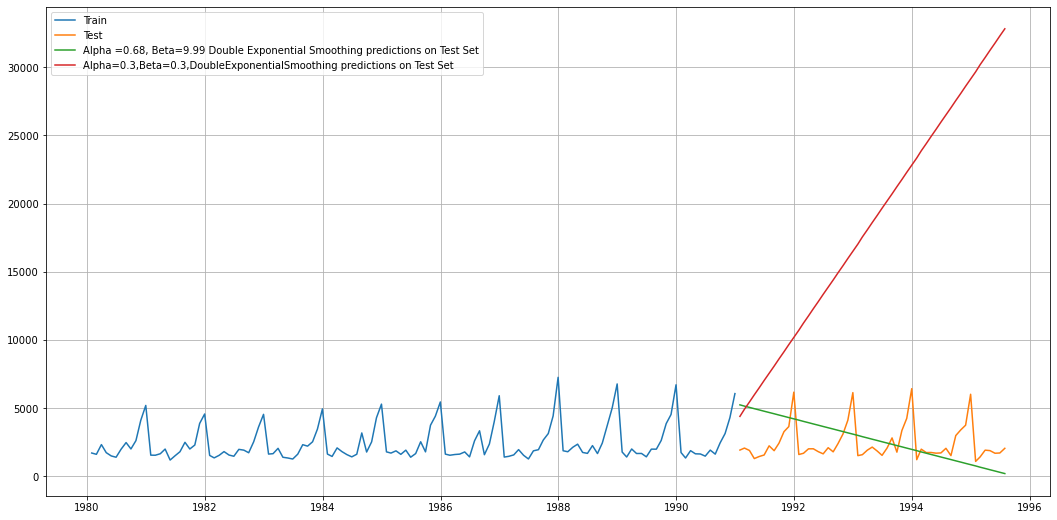

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.68, Beta=9.99 Double Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [57]:
resultsDES_final = pd.DataFrame({'Test RMSE': [resultsDES2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsDES_final])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


### Model 3. Triple Exponential Smoothing Model

In [58]:
TES_train = train.copy()
TES_test = test.copy()

In [59]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [60]:
model_TES_autofit = model_TES.fit()

In [61]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1577.224489
1991-02-28,2049,1333.677558
1991-03-31,1874,1745.945679
1991-04-30,1279,1630.411925
1991-05-31,1432,1523.289070


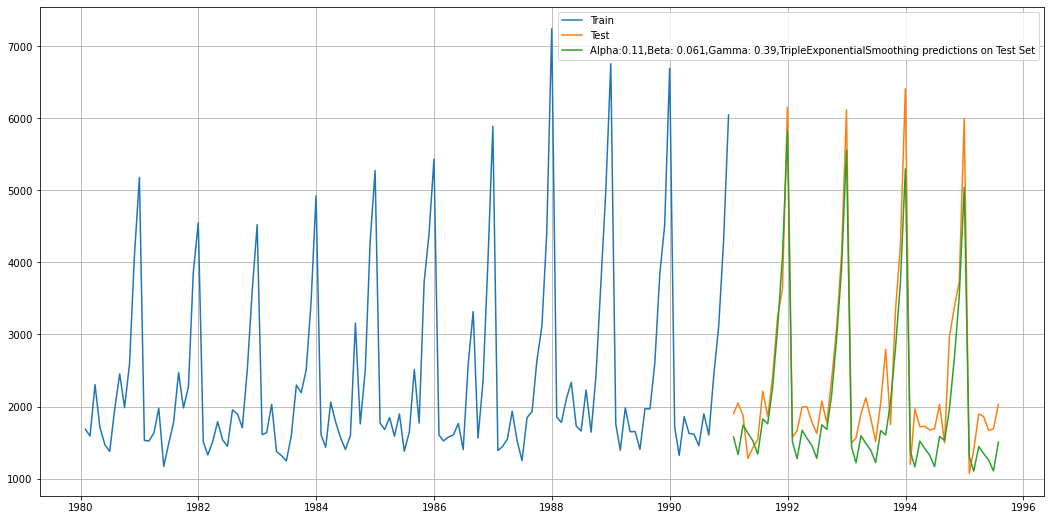

In [63]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [64]:
## Test Data

rmse_modelTES = mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha:0.11,Beta: 0.061,Gamma: 0.39, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelTES))

For Alpha:0.11,Beta: 0.061,Gamma: 0.39, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [65]:
resultsTES = pd.DataFrame({'Test RMSE': [rmse_modelTES]}
                           ,index=['Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsTES])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970


#### Trying different values of Alpha, Beta and Gamma for Triple Exponential Smoothing Model

In [66]:
## First we will define an empty dataframe to store our values from the loop

resultsTES2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsTES2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [67]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_modelTES2_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES2_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsTES2 = resultsTES2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_modelTES2_train,'Test RMSE':rmse_modelTES2_test}
                                                 , ignore_index=True)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Honey Sam\anaconda3\lib\site-packag

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed i

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_7652/3284401656.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
 

In [68]:
resultsTES2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,3.927862e+02
1,0.3,0.3,0.4,402.088628,9.513202e+02
2,0.3,0.3,0.5,408.282432,1.470487e+03
3,0.3,0.3,0.6,428.631668,2.181724e+03
4,0.3,0.3,0.7,468.958530,3.513351e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,153394.791826,7.989790e+05
508,1.0,1.0,0.7,94040.964958,1.074413e+06
509,1.0,1.0,0.8,102196.953755,5.010607e+06
510,1.0,1.0,0.9,77924.294413,4.318265e+05


In [69]:
resultsTES2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,392.786198
8,0.3,0.4,0.3,424.828055,410.854547
65,0.4,0.3,0.4,435.553595,421.409170
296,0.7,0.8,0.3,700.317756,518.188752
130,0.5,0.3,0.5,498.239915,542.175497


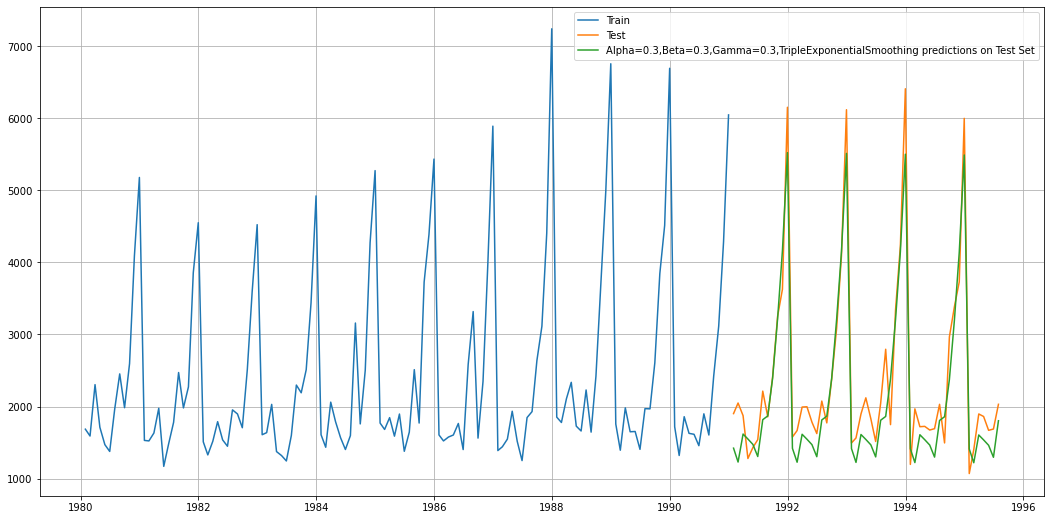

In [70]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3,0.3,0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

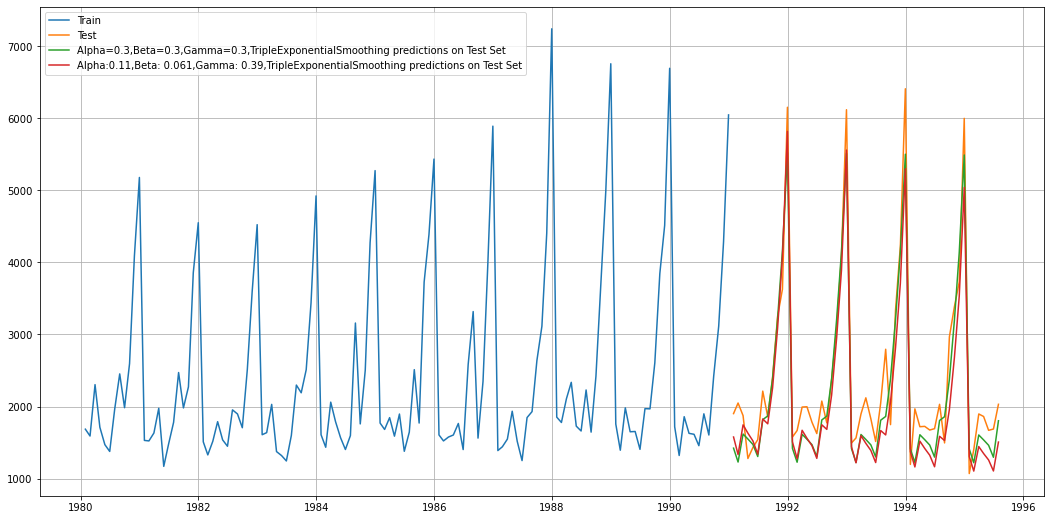

In [71]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3,0.3,0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [72]:
resultsTES_final = pd.DataFrame({'Test RMSE': [resultsTES2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDF1 = pd.concat([resultsDF1, resultsTES_final])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198


### Model 4: Linear Regression Model

In [73]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [74]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [75]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

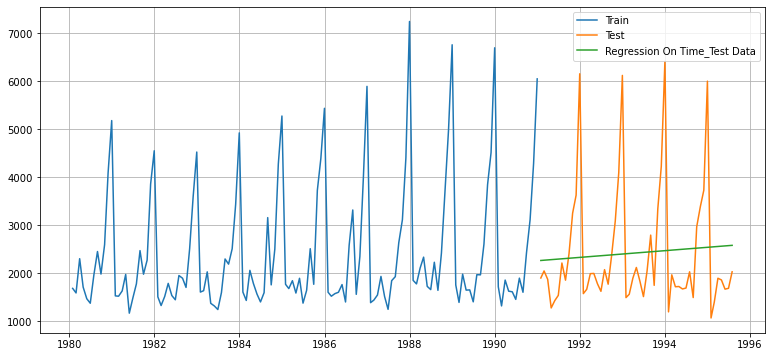

In [79]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [80]:
## Test Data - RMSE

rmse_modelLR = mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelLR))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [81]:
results_LR = pd.DataFrame({'Test RMSE': [rmse_modelLR]},index=['RegressionOnTime'])
resultsDF1 = pd.concat([resultsDF1, results_LR])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
RegressionOnTime,1275.867052


### Model 5: Naiive Forecast Models 

In [82]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [83]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

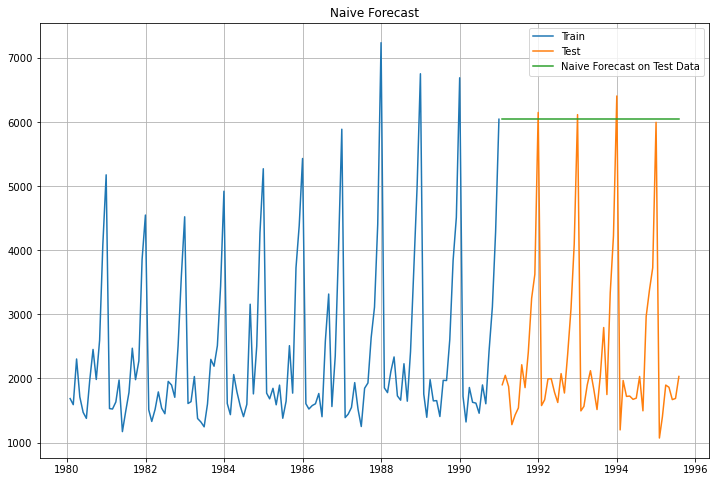

In [84]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [85]:
## Test Data - RMSE

rmse_Naive_test= mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_Naive_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [86]:
results_Naive = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['NaiveModel'])

resultsDF1 = pd.concat([resultsDF1, results_Naive])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
RegressionOnTime,1275.867052
NaiveModel,3864.279352


### Model 6.1: Simple Average Models

In [87]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [88]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


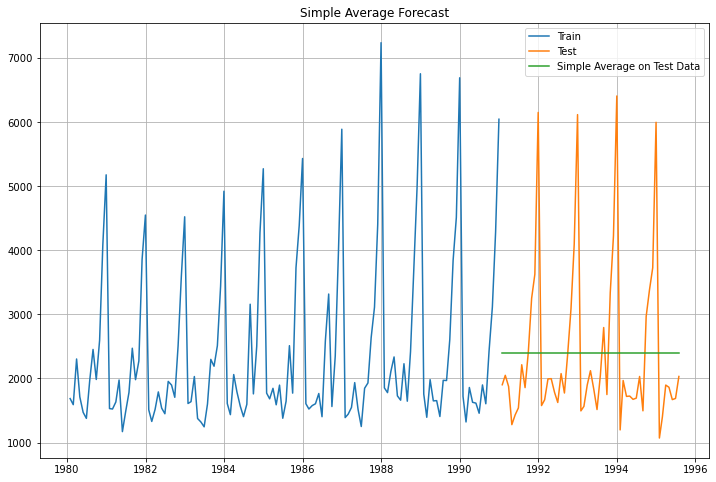

In [89]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [90]:
## Test Data - RMSE 

rmse_Simple_Avg = mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_Simple_Avg))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [91]:
results_Simple_Avg = pd.DataFrame({'Test RMSE': [rmse_Simple_Avg]},index=['SimpleAverageModel'])

resultsDF1 = pd.concat([resultsDF1, results_Simple_Avg])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### Model 7. Moving Average Model

In [92]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [93]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


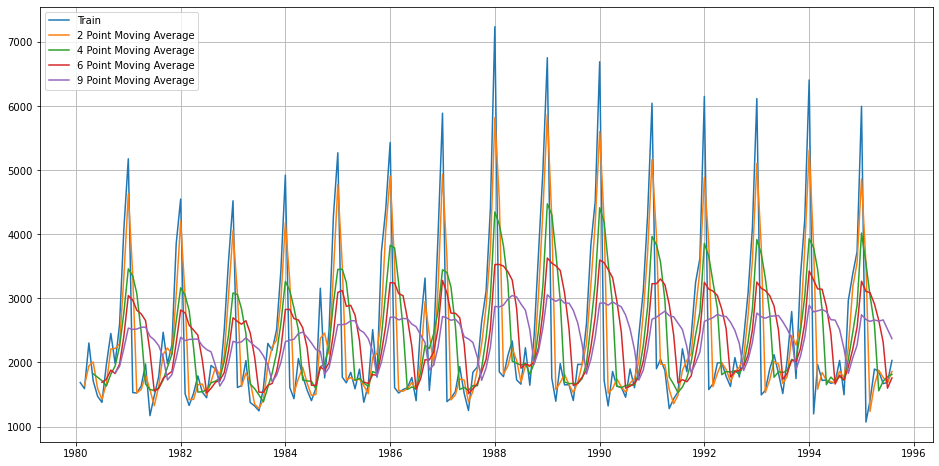

In [94]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [95]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [96]:
trailing_MovingAverage_train.head(5)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


In [97]:
trailing_MovingAverage_test.head(5)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1991-01-31,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-28,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-31,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-30,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-31,1432,1355.5,1658.50,2430.500000,2712.111111


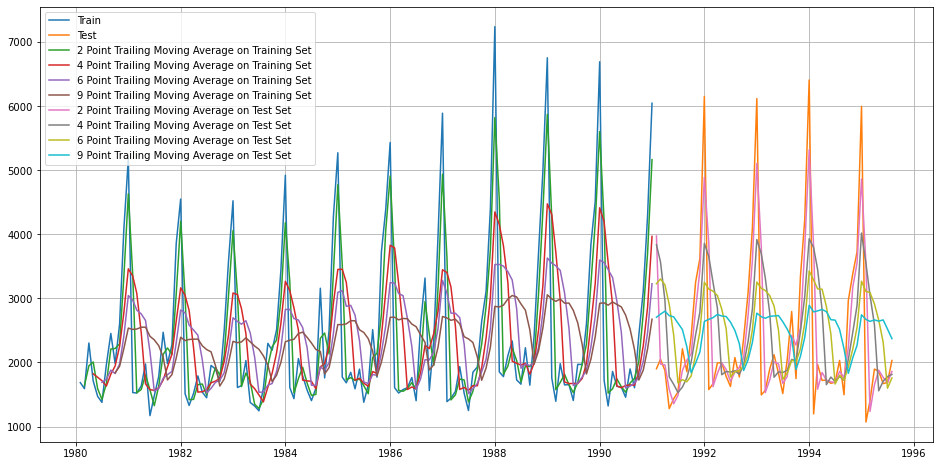

In [98]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [99]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_modelMA_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_modelMA_test_4 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_modelMA_test_6 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_modelMA_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_modelMA_test_9 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_modelMA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [100]:
results_MA = pd.DataFrame({'Test RMSE': [rmse_modelMA_test_2,rmse_modelMA_test_4
                                          ,rmse_modelMA_test_6,rmse_modelMA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDF1 = pd.concat([resultsDF1, results_MA])
resultsDF1

,Test RMSE
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
"Alpha=0.9,SES",3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


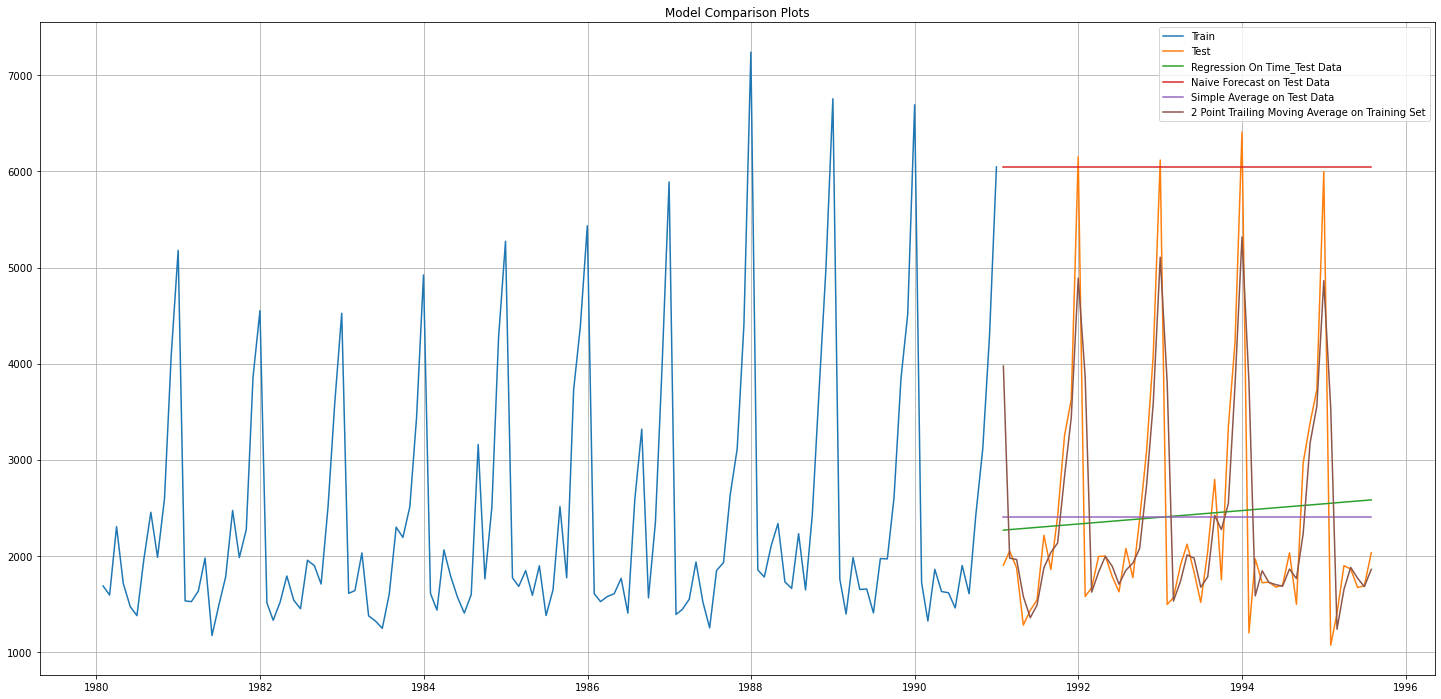

In [101]:
## Plotting on both Training and Test data

plt.figure(figsize=(25,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [102]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDF1.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",469.767970
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
RegressionOnTime,1275.867052
6pointTrailingMovingAverage,1283.927428
"Alpha=0.049,SimpleExponentialSmoothing",1316.035487
9pointTrailingMovingAverage,1346.278315
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",2007.238526


### Triple Exponential Smoothing on the entire data as it has the least RMSE 

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [107]:
from statsmodels.tsa.stattools import adfuller

In [108]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [109]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


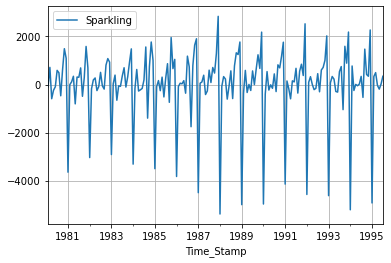

In [110]:
df.diff().dropna().plot(grid=True);

#### Checking entire data for stationarity and continuing with ARIMA/SARIMA models

In [112]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [113]:
train    =   df[df.index < '1991'] 
test     =   df[df.index >='1991']

In [114]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [115]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [116]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


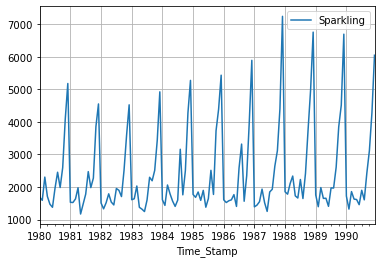

In [117]:
train.plot(grid=True);

In [118]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


In [119]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


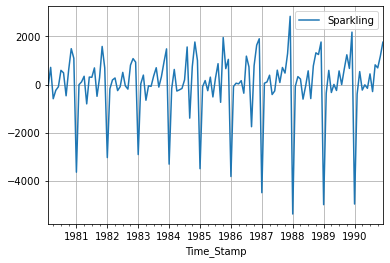

In [120]:
train.diff().dropna().plot(grid=True);

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA MODEL

In [122]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [123]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.458954
14,"(3, 1, 2)",2230.952333
11,"(2, 1, 3)",2232.937076
9,"(2, 1, 1)",2233.777626


In [126]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 30 Nov 2022   AIC                           2213.509
Time:                        21:31:42   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


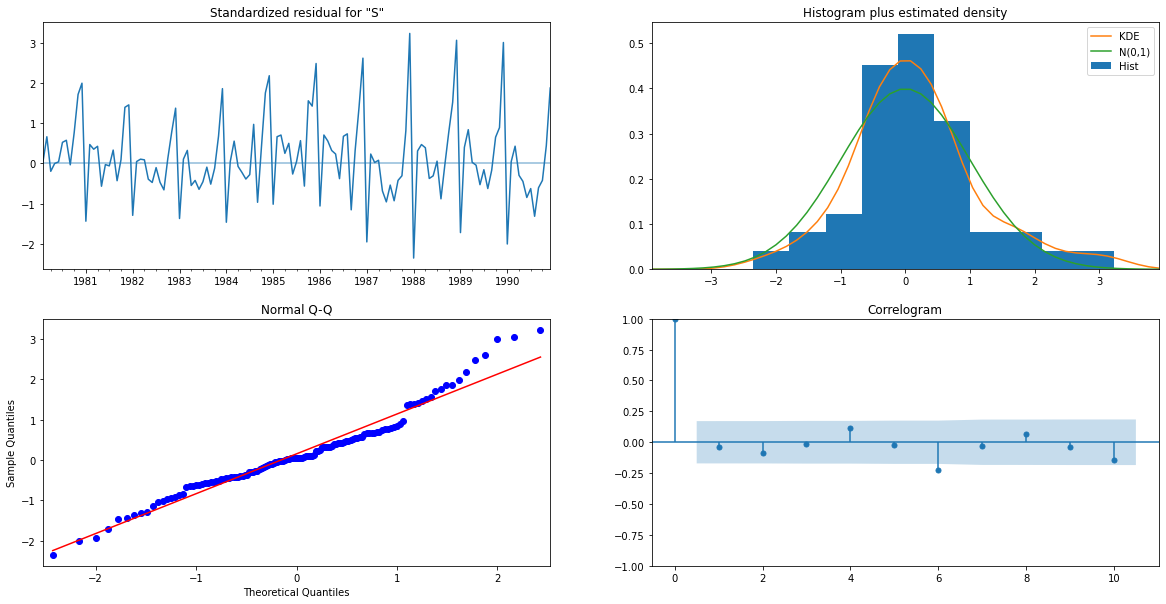

In [127]:
results_auto_ARIMA.plot_diagnostics(figsize=(20,10));

In [128]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [129]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [130]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9796397916396 
MAPE: 47.09998646565863


In [131]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA with lowest AIC(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA with lowest AIC(2,1,2)",1299.97964,47.099986


### SARIMA Model with lowest AIC 

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [136]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [137]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [138]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536892695
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973322
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430967
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123151866
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094940895
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510475
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657137
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549575
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.687995381667
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858030697
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138750511078
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082834
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339538774
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285285503232
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878457
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298136812
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274198203
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.624323075836
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510384362
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933054773
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.641477350578
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AI

SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875404640256
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726418702675
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.11022177934
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058951916443
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1836.889941183051
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.8070845639097
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2946341000647
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267440982167
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1925815225138
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1647.2844069317334
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1676.126655991079
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1675.5877026659248
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1663.522698262675
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1651.8377388198044
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:2171.039589108596
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2060.2433998401148
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1853.1558896488632
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1782.6730508658254
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC

In [139]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.052710
251,"(3, 1, 3)","(2, 0, 3, 6)",1631.005209
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327863
63,"(0, 1, 3)","(3, 0, 3, 6)",1634.986909
123,"(1, 1, 3)","(2, 0, 3, 6)",1635.427440
127,"(1, 1, 3)","(3, 0, 3, 6)",1636.068300
255,"(3, 1, 3)","(3, 0, 3, 6)",1636.571910
191,"(2, 1, 3)","(3, 0, 3, 6)",1638.141482
254,"(3, 1, 3)","(3, 0, 2, 6)",1644.567749
107,"(1, 1, 2)","(2, 0, 3, 6)",1645.488346


In [140]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -807.034
Date:                           Wed, 30 Nov 2022   AIC                           1636.068
Time:                                   21:41:48   BIC                           1665.673
Sample:                               01-31-1980   HQIC                          1648.074
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6840      0.348     -1.965      0.049      -1.366      -0.002
ma.L1         -0.0842      0.347     -0.243

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


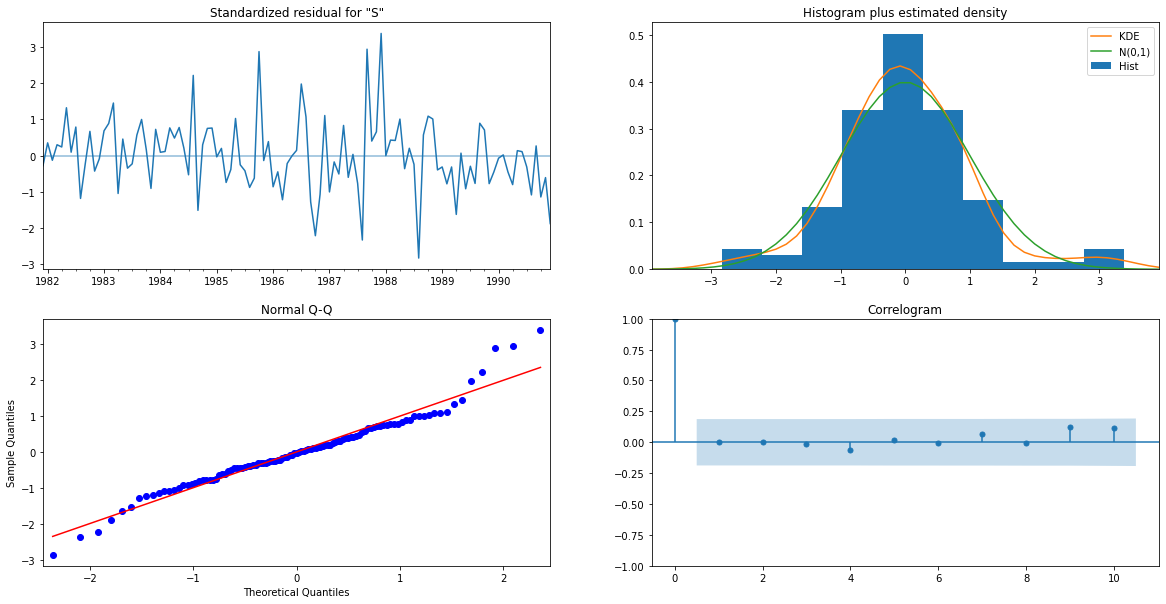

In [141]:
results_auto_SARIMA.plot_diagnostics(figsize=(20,10));

In [142]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [143]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1318.981540,390.146831,554.307802,2083.655278
1991-02-28,1054.169356,400.489868,269.223638,1839.115074
1991-03-31,1632.936226,400.549610,847.873417,2417.999035
1991-04-30,1564.181290,407.939921,764.633736,2363.728843
1991-05-31,1207.606572,409.049928,405.883445,2009.329699


In [144]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 800.9073622298524 
MAPE: 35.29088599877724


In [145]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA with lowest AIC(1,1,3)(3,0,3,6)'])
temp_resultsDf

,RMSE,MAPE
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886


In [146]:
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

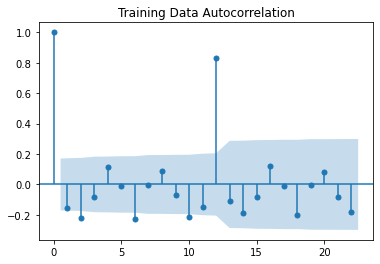

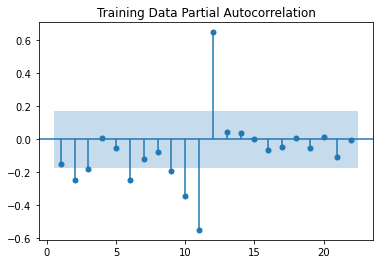

In [148]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

By looking at the above plots, we will take the value of p and q to be 2 and 1 respectively.

In [149]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,0,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1110.586
Date:                Wed, 30 Nov 2022   AIC                           2235.173
Time:                        21:41:50   BIC                           2255.352
Sample:                    01-31-1980   HQIC                          2243.373
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2402.8824      0.000   2.27e+07      0.000    2402.882    2402.883
ar.L1          0.2544      0.124      2.059      0.039       0.012       0.497
ar.L2          0.7026      0.157      4.482      0.0

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


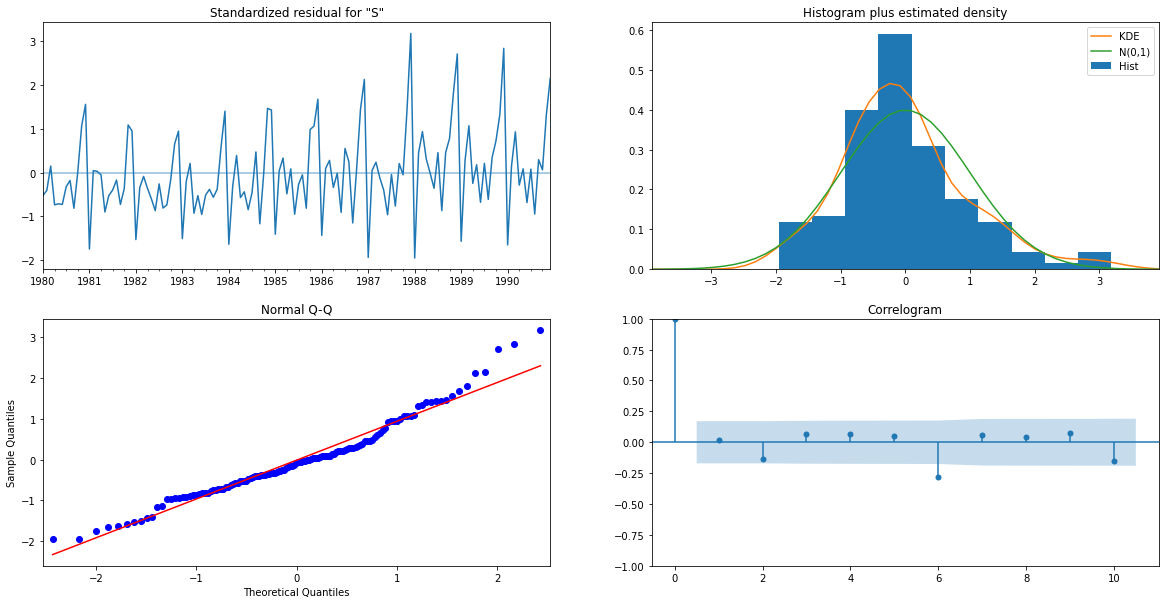

In [150]:
results_manual_ARIMA.plot_diagnostics(figsize=(20,10));

In [151]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [152]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1245.4712548081973 
MAPE: 36.51176962964431


In [153]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA based on ACF&PACF plots(3,0,2)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886
"ARIMA based on ACF&PACF plots(3,0,2)",1245.471255,36.511770


### SARIMA based on ACF & PACF plots

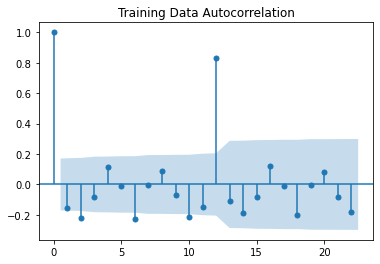

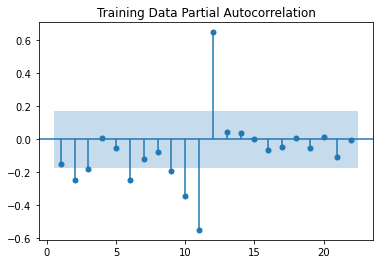

In [154]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [155]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -878.809
Date:                           Wed, 30 Nov 2022   AIC                           1777.618
Time:                                   21:41:57   BIC                           1804.532
Sample:                               01-31-1980   HQIC                          1788.533
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7174      0.678      1.058      0.290      -0.611       2.046
ar.L2          0.1896      0.859      0.221

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


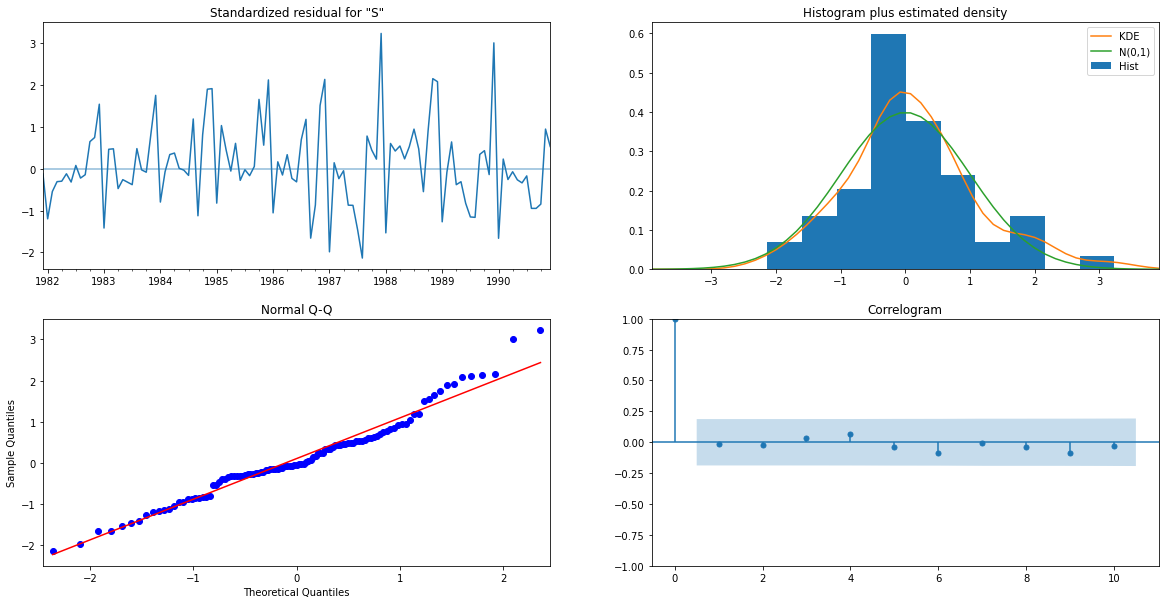

In [156]:
results_manual_SARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

In [157]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [158]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1235.2556804733752 
MAPE: 45.07263046748957


In [159]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886
"ARIMA based on ACF&PACF plots(3,0,2)",1245.471255,36.511770
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",1235.255680,45.072630


In [160]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE,MAPE
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",1235.255680,45.072630
"ARIMA based on ACF&PACF plots(3,0,2)",1245.471255,36.511770
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [161]:
resultsDF2= resultsDf.copy()
resultsDF2

,RMSE,MAPE
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886
"ARIMA based on ACF&PACF plots(3,0,2)",1245.471255,36.511770
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",1235.255680,45.072630


In [162]:
Results_Sparkling = pd.concat([resultsDF2,resultsDF1])
Results_Sparkling

,RMSE,MAPE,Test RMSE
"ARIMA with lowest AIC(2,1,2)",1299.979640,47.099986,NaN
"SARIMA with lowest AIC(1,1,3)(3,0,3,6)",800.907362,35.290886,NaN
"ARIMA based on ACF&PACF plots(3,0,2)",1245.471255,36.511770,NaN
"SARIMA based on ACF &PACF plots(3,1,3)(0,0,3,6)",1235.255680,45.072630,NaN
"Alpha=0.049,SimpleExponentialSmoothing",NaN,NaN,1316.035487
"Alpha=0.9,SES",NaN,NaN,3686.794285
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",NaN,NaN,2007.238526
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",NaN,NaN,18259.110704
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",NaN,NaN,469.767970
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",NaN,NaN,392.786198


In [178]:
Results_Sparkling.sort_values(by='Test RMSE',ascending =True)

,RMSE,MAPE,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",NaN,NaN,392.786198
"Alpha:0.11,Beta: 0.061,Gamma: 0.39,TripleExponentialSmoothing",NaN,NaN,469.767970
2pointTrailingMovingAverage,NaN,NaN,813.400684
4pointTrailingMovingAverage,NaN,NaN,1156.589694
SimpleAverageModel,NaN,NaN,1275.081804
RegressionOnTime,NaN,NaN,1275.867052
6pointTrailingMovingAverage,NaN,NaN,1283.927428
"Alpha=0.049,SimpleExponentialSmoothing",NaN,NaN,1316.035487
9pointTrailingMovingAverage,NaN,NaN,1346.278315
"Alpha=0.68,Beta=9.99,DoubleExponentialSmoothing",NaN,NaN,2007.238526


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Triple Exponential Smoothing has the least RMSE score at 392.786. and 469. We will use the first two paramters for alpha beta and gamma to prepare models on the complete data to predict the next 12 months.

In [225]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [226]:
from sklearn.metrics import mean_squared_error

In [227]:
RMSE_fullmodel1 = mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 421.47309095989743


In [228]:
# Getting the predictions for 12 months into future
prediction_1 = fullmodel1.forecast(steps=12)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


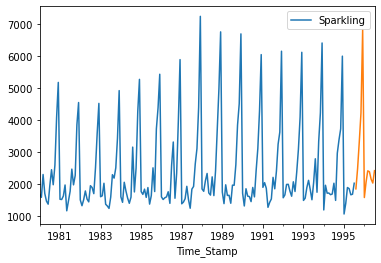

In [229]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [230]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1027.191146,1855.493994,2683.796842
1995-09-30,1658.733462,2487.036310,3315.339158
1995-10-31,2495.218486,3323.521334,4151.824182
1995-11-30,3397.443409,4225.746256,5054.049104
1995-12-31,6000.631745,6828.934592,7657.237440


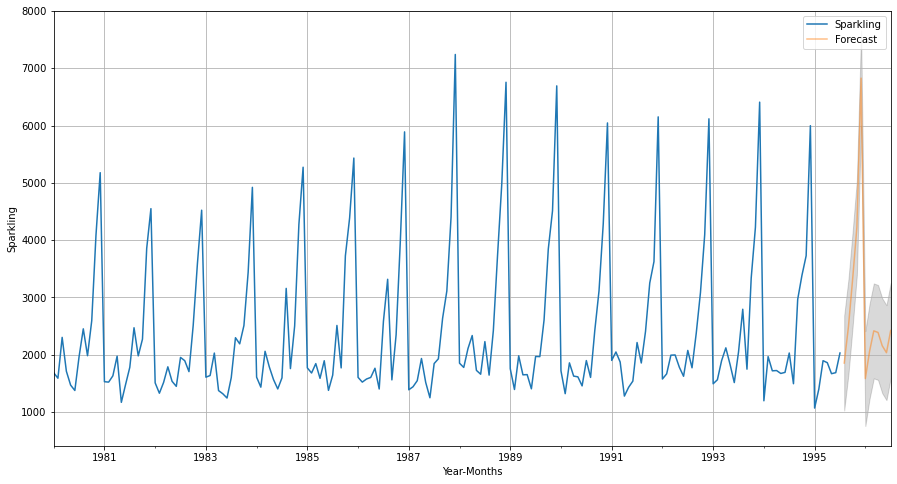

In [231]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [208]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.11,
                                                                 smoothing_trend=0.061,
                                                                 smoothing_seasonal=0.39)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [209]:
RMSE_fullmodel2 = mean_squared_error(df['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 353.00394202572005


In [210]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=12)

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


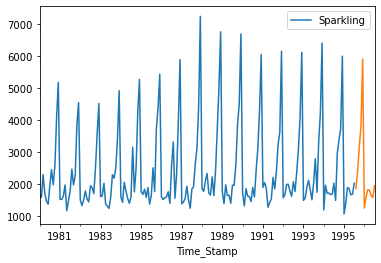

In [211]:
df.plot()
prediction_2.plot();

In [212]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1034.637923,1862.940771,2691.243619
1995-09-30,1575.139242,2403.442090,3231.744938
1995-10-31,2332.424269,3160.727116,3989.029964
1995-11-30,2969.252539,3797.555387,4625.858235
1995-12-31,5081.035330,5909.338178,6737.641026


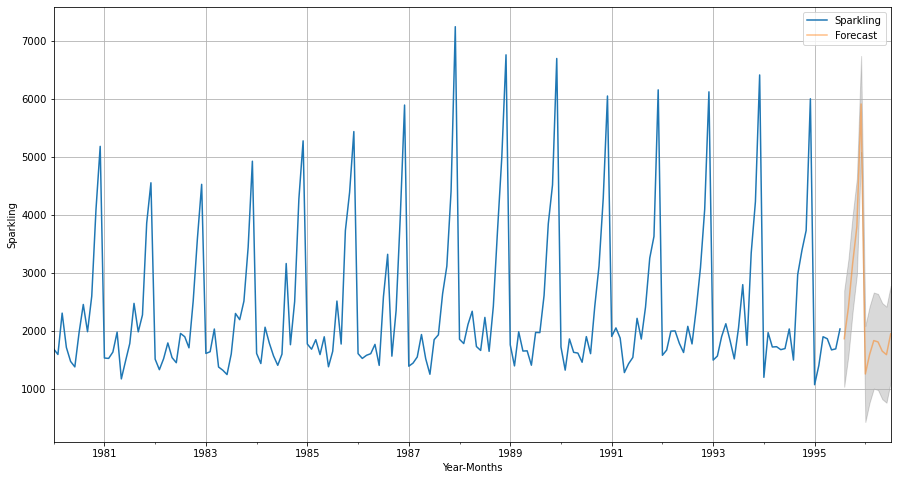

In [213]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

In [234]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Honey Sam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1208.844
Date:                           Thu, 01 Dec 2022   AIC                           2439.687
Time:                                   17:08:52   BIC                           2473.786
Sample:                               01-31-1980   HQIC                          2453.530
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1426      0.786      0.182      0.856      -1.397       1.682
ma.L1         -3.4231      4.280     -0.800

In [235]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [236]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1827.261229,376.898191,1088.554349,2565.968109
1995-09-30,2383.905720,382.619052,1633.986159,3133.825282
1995-10-31,3264.251435,382.683630,2514.205302,4014.297567
1995-11-30,4019.497825,383.308468,3268.227034,4770.768617
1995-12-31,6270.328814,384.189784,5517.330675,7023.326953


In [237]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 543.816717528227


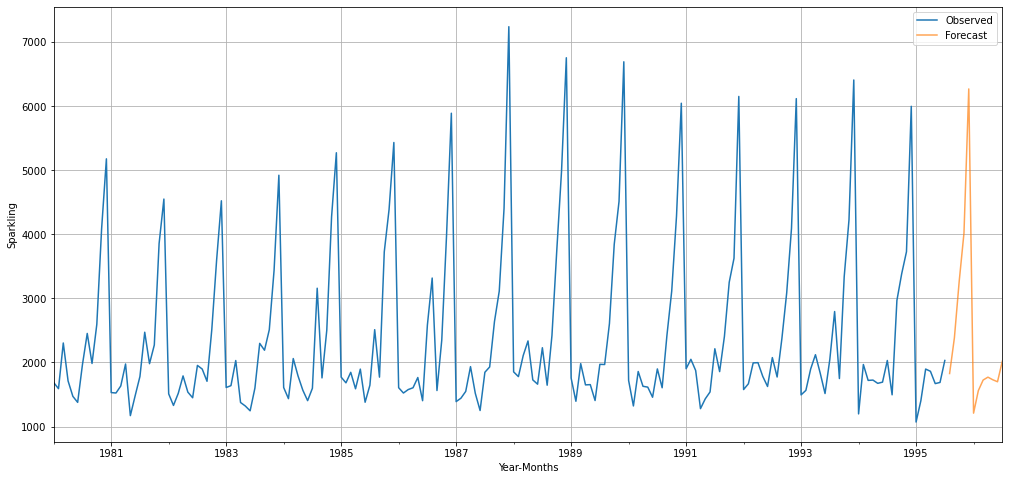

In [243]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, figsize=(17,8))

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();